In [463]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Read data

In [464]:
df1 = pd.read_csv('./1-199.csv')
df2 = pd.read_csv('./200-300.csv')
df3 = pd.read_csv('./300-360.csv')
df4 = pd.read_csv('./400-492.csv')
df5 = pd.read_csv('./500-600.csv')
df6 = pd.read_csv('./601-685.csv')

In [465]:
# Merge all dataframes
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
# Create a new dataframe with 'Title' and 'Genres' columns
dfinit = df[['Title', 'Genres']]

# Display the merged dataframe to verify the changes
df.head()

,Unnamed: 0,Title,Rating,Number of User Reviews,Year,Duration,Genres
0,0.0,Dekalog (1988),7.6,135.0,1996,9 h 32 m,['Drama']
1,1.0,Casablanca,8.7,592.0,1943,1 h 42 m,"['Drama', 'Romance', 'War']"
2,2.0,Rear Window,8.7,588.0,1954,1 h 52 m,"['Mystery', 'Thriller']"
3,3.0,Lawrence of Arabia (re-release),8.5,447.0,2002,3 h 36 m,"['Adventure', 'Biography', 'Drama', 'War']"
4,4.0,The Conformist,7.2,113.0,1970,1 h 47 m,['Drama']


In [466]:
df.shape

(14297, 7)

In [467]:
df.head()

,Unnamed: 0,Title,Rating,Number of User Reviews,Year,Duration,Genres
0,0.0,Dekalog (1988),7.6,135.0,1996,9 h 32 m,['Drama']
1,1.0,Casablanca,8.7,592.0,1943,1 h 42 m,"['Drama', 'Romance', 'War']"
2,2.0,Rear Window,8.7,588.0,1954,1 h 52 m,"['Mystery', 'Thriller']"
3,3.0,Lawrence of Arabia (re-release),8.5,447.0,2002,3 h 36 m,"['Adventure', 'Biography', 'Drama', 'War']"
4,4.0,The Conformist,7.2,113.0,1970,1 h 47 m,['Drama']


In [468]:
df.dtypes

Unnamed: 0                float64
Title                      object
Rating                     object
Number of User Reviews    float64
Year                       object
Duration                   object
Genres                     object
dtype: object

# EDA

## Drop nulls

In [469]:
df.shape

(14297, 7)

In [470]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14297 entries, 0 to 14296
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   14295 non-null  object 
 1   Rating                  14287 non-null  object 
 2   Number of User Reviews  11866 non-null  float64
 3   Year                    14295 non-null  object 
 4   Duration                14276 non-null  object 
 5   Genres                  14297 non-null  object 
dtypes: float64(1), object(5)
memory usage: 670.3+ KB


In [472]:
df.dropna(inplace=True)

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres
0,Dekalog (1988),7.6,135.0,1996,9 h 32 m,['Drama']
1,Casablanca,8.7,592.0,1943,1 h 42 m,"['Drama', 'Romance', 'War']"
2,Rear Window,8.7,588.0,1954,1 h 52 m,"['Mystery', 'Thriller']"
3,Lawrence of Arabia (re-release),8.5,447.0,2002,3 h 36 m,"['Adventure', 'Biography', 'Drama', 'War']"
4,The Conformist,7.2,113.0,1970,1 h 47 m,['Drama']


In [473]:
df.shape

(11847, 6)

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11847 entries, 0 to 14287
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   11847 non-null  object 
 1   Rating                  11847 non-null  object 
 2   Number of User Reviews  11847 non-null  float64
 3   Year                    11847 non-null  object 
 4   Duration                11847 non-null  object 
 5   Genres                  11847 non-null  object 
dtypes: float64(1), object(5)
memory usage: 647.9+ KB


In [475]:
df.dtypes

Title                      object
Rating                     object
Number of User Reviews    float64
Year                       object
Duration                   object
Genres                     object
dtype: object

## `Rating` cleaning

In [476]:
df['Rating'].unique()

array([7.6, 8.7, 8.5, 7.2, 9.3, 7.8, 8.3, 8.6, 7.9, 7.7, 8.8, 7.1, 6.7,
       8.2, 9.0, 8.1, 5.9, 8.4, 7.0, 8.9, 8.0, 7.4, 9.2, 7.5, 6.0, 6.9,
       5.3, 6.6, 9.1, 7.3, 6.5, 9.4, 6.4, 4.4, 5.0, 5.2, 5.7, 6.8, 6.2,
       2.5, 6.3, 4.8, 4.0, 4.6, 4.7, 4.9, 4.2, 6.1, 5.5, 4.3, 9.8, 5.4,
       5.6, 5.8, 3.0, 9.6, 5.1, 4.5, 3.9, 2.4, 2.0, 3.4, 3.2, 3.6, 4.1,
       2.2, 2.8, 3.8, 2.3, 3.1, 2.7, 3.5, 1.8, 3.3, '6.0', '8.4', '8.7',
       '7.1', '5.3', '8.6', '6.2', '5.8', '6.1', '5.5', '8.2', '6.3',
       '7.8', '7.0', '7.3', '8.3', '6.9', '8.0', '7.2', '7.6', '8.1',
       '3.0', '7.4', '6.8', '6.6', '0.6', '7.7', '7.5', '7.9', '4.6',
       '6.7', '6.5', '5.7', '4.3', '4.2', '8.5', '6.4', '5.4', '5.0',
       '4.0', '5.6', '5.9', '3.8', '3.3', '4.9', '5.2', '4.7', '4.8',
       '5.1', '9.1', '8.8', '4.5', '10.0', '2.0', '2.5', '4.4', '2.9',
       '1.6', '8.9', '9.5', '0.9', '2.4', '3.6', '3.7', '3.1', '4.1',
       '9.3', '9.2', '2.8', '3.9', '9.8', '3.2', '1.9', '3.5', '1.4',
      

In [477]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres
0,Dekalog (1988),7.6,135.0,1996,9 h 32 m,['Drama']
1,Casablanca,8.7,592.0,1943,1 h 42 m,"['Drama', 'Romance', 'War']"
2,Rear Window,8.7,588.0,1954,1 h 52 m,"['Mystery', 'Thriller']"
3,Lawrence of Arabia (re-release),8.5,447.0,2002,3 h 36 m,"['Adventure', 'Biography', 'Drama', 'War']"
4,The Conformist,7.2,113.0,1970,1 h 47 m,['Drama']


In [478]:
df.dtypes

Title                      object
Rating                    float64
Number of User Reviews    float64
Year                       object
Duration                   object
Genres                     object
dtype: object

## `Year` cleaning

In [479]:
df['Year'].unique()

array([1996, 1943, 1954, 2002, 1970, 1972, 2004, 1941, 2014, 1994, 1958,
       1946, 1952, 1973, 2006, 1931, 2016, 1916, 1950, 1940, 1956, 1969,
       1966, 1938, 1948, 1959, 1951, 1929, 1962, 1989, 1955, 1985, 1949,
       1964, 1960, 2000, 2008, 2019, 1926, 1957, 2018, 1995, 2021, 2013,
       2007, 1975, 1968, 2012, 1991, 2020, 1935, 2010, 2024, 2022, 2009,
       2011, 1944, 1927, 1961, 1993, 2015, 2017, 1976, 1984, 1945, 1979,
       1978, 2023, 1967, 2003, 1971, 1942, 1990, 1933, 1939, 1981, 2001,
       1992, 1963, 1953, 1999, 1986, 1974, 1997, 1982, 1977, 1965, 1936,
       1930, 1983, 1998, 1947, 1932, 1980, 2005, 1988, 1937, 1934, 1987,
       '1942', '2024', '1976', '1994', '2023', '2016', '2015', '2005',
       '2022', '2003', '2013', '2007', '2012', '2000', '2001', '2011',
       '2014', '2008', '1996', '2009', '2019', '2021', '1979', '2004',
       '2020', '2002', '1999', '1977', '1970', '1978', '1992', '2017',
       '1984', '1997', '2006', '2010', '2018', '1964', '199

In [480]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres
0,Dekalog (1988),7.6,135.0,1996,9 h 32 m,['Drama']
1,Casablanca,8.7,592.0,1943,1 h 42 m,"['Drama', 'Romance', 'War']"
2,Rear Window,8.7,588.0,1954,1 h 52 m,"['Mystery', 'Thriller']"
3,Lawrence of Arabia (re-release),8.5,447.0,2002,3 h 36 m,"['Adventure', 'Biography', 'Drama', 'War']"
4,The Conformist,7.2,113.0,1970,1 h 47 m,['Drama']


In [481]:
df.dtypes

Title                      object
Rating                    float64
Number of User Reviews    float64
Year                        Int64
Duration                   object
Genres                     object
dtype: object

## `Duration` cleaning

In [482]:
df = df[df['Duration'].str[0].str.isdigit()]

In [483]:
df['Duration'].unique()

array(['9 h 32 m', '1 h 42 m', '1 h 52 m', '3 h 36 m', '1 h 47 m',
       '2 h 55 m', '2 h 16 m', '3 h 7 m', '1 h 59 m', '2 h 45 m',
       '1 h 39 m', '2 h 8 m', '1 h 41 m', '3 h 8 m', '1 h 43 m',
       '2 h 35 m', '1 h 35 m', '2 h 25 m', '1 h 27 m', '1 h 51 m',
       '3 h 17 m', '1 h 50 m', '1 h 28 m', '3 h 27 m', '2 h 15 m',
       '1 h 36 m', '1 h 34 m', '2 h 6 m', '1 h 58 m', '2 h 1 m',
       '2 h 50 m', '2 h 18 m', '2 h 33 m', '1 h 45 m', '1 h 32 m',
       '2 h 42 m', '3 h 58 m', '1 h 44 m', '1 h 49 m', '2 h 2 m',
       '1 h 53 m', '2 h 12 m', '1 h 15 m', '1 h 40 m', '1 h 4 m',
       '1 h 8 m', '2 h 5 m', '1 h 21 m', '1 h 57 m', '2 h 14 m',
       '2 h 17 m', '2 h 40 m', '2 h 13 m', '2 h 4 m', '2 h 9 m',
       '1 h 23 m', '3 h 10 m', '1 h 31 m', '1 h 24 m', '2 h', '1 h 33 m',
       '3 h 4 m', '2 h 43 m', '1 h 38 m', '2 h 7 m', '2 h 11 m',
       '2 h 34 m', '2 h 37 m', '2 h 3 m', '2 h 54 m', '3 h 15 m',
       '1 h 46 m', '2 h 58 m', '1 h 54 m', '1 h 56 m', '2 h 53 m',
  

In [484]:
df.shape

(11840, 6)

In [485]:
df = df[df['Duration'].str.contains('h|m', na=False)]

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres
0,Dekalog (1988),7.6,135.0,1996,9 h 32 m,['Drama']
1,Casablanca,8.7,592.0,1943,1 h 42 m,"['Drama', 'Romance', 'War']"
2,Rear Window,8.7,588.0,1954,1 h 52 m,"['Mystery', 'Thriller']"
3,Lawrence of Arabia (re-release),8.5,447.0,2002,3 h 36 m,"['Adventure', 'Biography', 'Drama', 'War']"
4,The Conformist,7.2,113.0,1970,1 h 47 m,['Drama']


In [486]:
df.shape

(11597, 6)

In [487]:
df['Duration'].unique()

array(['9 h 32 m', '1 h 42 m', '1 h 52 m', '3 h 36 m', '1 h 47 m',
       '2 h 55 m', '2 h 16 m', '3 h 7 m', '1 h 59 m', '2 h 45 m',
       '1 h 39 m', '2 h 8 m', '1 h 41 m', '3 h 8 m', '1 h 43 m',
       '2 h 35 m', '1 h 35 m', '2 h 25 m', '1 h 27 m', '1 h 51 m',
       '3 h 17 m', '1 h 50 m', '1 h 28 m', '3 h 27 m', '2 h 15 m',
       '1 h 36 m', '1 h 34 m', '2 h 6 m', '1 h 58 m', '2 h 1 m',
       '2 h 50 m', '2 h 18 m', '2 h 33 m', '1 h 45 m', '1 h 32 m',
       '2 h 42 m', '3 h 58 m', '1 h 44 m', '1 h 49 m', '2 h 2 m',
       '1 h 53 m', '2 h 12 m', '1 h 15 m', '1 h 40 m', '1 h 4 m',
       '1 h 8 m', '2 h 5 m', '1 h 21 m', '1 h 57 m', '2 h 14 m',
       '2 h 17 m', '2 h 40 m', '2 h 13 m', '2 h 4 m', '2 h 9 m',
       '1 h 23 m', '3 h 10 m', '1 h 31 m', '1 h 24 m', '2 h', '1 h 33 m',
       '3 h 4 m', '2 h 43 m', '1 h 38 m', '2 h 7 m', '2 h 11 m',
       '2 h 34 m', '2 h 37 m', '2 h 3 m', '2 h 54 m', '3 h 15 m',
       '1 h 46 m', '2 h 58 m', '1 h 54 m', '1 h 56 m', '2 h 53 m',
  

In [488]:
# Extract hours and minutes from the 'Duration' column
df['Hours'] = df['Duration'].str.extract(r'(\d+) h').astype(float).fillna(0)
df['Minutes'] = df['Duration'].str.extract(r'(\d+) m').astype(float).fillna(0)

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres,Hours,Minutes
0,Dekalog (1988),7.6,135.0,1996,9 h 32 m,['Drama'],9.0,32.0
1,Casablanca,8.7,592.0,1943,1 h 42 m,"['Drama', 'Romance', 'War']",1.0,42.0
2,Rear Window,8.7,588.0,1954,1 h 52 m,"['Mystery', 'Thriller']",1.0,52.0
3,Lawrence of Arabia (re-release),8.5,447.0,2002,3 h 36 m,"['Adventure', 'Biography', 'Drama', 'War']",3.0,36.0
4,The Conformist,7.2,113.0,1970,1 h 47 m,['Drama'],1.0,47.0


In [489]:
# Calculate the total duration in minutes
df['Duration'] = df['Hours'] * 60 + df['Minutes']

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres,Hours,Minutes
0,Dekalog (1988),7.6,135.0,1996,572.0,['Drama'],9.0,32.0
1,Casablanca,8.7,592.0,1943,102.0,"['Drama', 'Romance', 'War']",1.0,42.0
2,Rear Window,8.7,588.0,1954,112.0,"['Mystery', 'Thriller']",1.0,52.0
3,Lawrence of Arabia (re-release),8.5,447.0,2002,216.0,"['Adventure', 'Biography', 'Drama', 'War']",3.0,36.0
4,The Conformist,7.2,113.0,1970,107.0,['Drama'],1.0,47.0


In [490]:
df[df['Duration'].isnull()]

,Title,Rating,Number of User Reviews,Year,Duration,Genres,Hours,Minutes


In [491]:
df['Duration'] = df['Duration'].astype(int)

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres,Hours,Minutes
0,Dekalog (1988),7.6,135.0,1996,572,['Drama'],9.0,32.0
1,Casablanca,8.7,592.0,1943,102,"['Drama', 'Romance', 'War']",1.0,42.0
2,Rear Window,8.7,588.0,1954,112,"['Mystery', 'Thriller']",1.0,52.0
3,Lawrence of Arabia (re-release),8.5,447.0,2002,216,"['Adventure', 'Biography', 'Drama', 'War']",3.0,36.0
4,The Conformist,7.2,113.0,1970,107,['Drama'],1.0,47.0


In [492]:
df.drop(['Hours', 'Minutes'], axis=1, inplace=True)

In [493]:
df.dtypes

Title                      object
Rating                    float64
Number of User Reviews    float64
Year                        Int64
Duration                    int32
Genres                     object
dtype: object

## `Genres` cleaning

In [494]:
df['Genres'].unique().tolist()

["['Drama']",
 "['Drama', 'Romance', 'War']",
 "['Mystery', 'Thriller']",
 "['Adventure', 'Biography', 'Drama', 'War']",
 "['Crime', 'Drama']",
 "['Drama', 'History']",
 "['Drama', 'Mystery']",
 "['Drama', 'Mystery', 'Romance']",
 "['Mystery', 'Romance', 'Thriller']",
 "['Drama', 'Film-Noir', 'Romance', 'Thriller']",
 "['Comedy', 'Musical', 'Romance']",
 "['Comedy']",
 "['Crime', 'Drama', 'Film-Noir', 'Thriller']",
 "['Drama', 'War']",
 "['Comedy', 'Drama', 'Romance']",
 "['Comedy', 'Drama']",
 "['Animation', 'Adventure', 'Comedy', 'Family', 'Fantasy', 'Musical']",
 "['Action', 'Drama']",
 "['Action', 'Adventure', 'Drama', 'Western']",
 "['Crime', 'Drama', 'Romance']",
 "['Adventure', 'Drama', 'Western']",
 "['Drama', 'Fantasy', 'War']",
 "['Comedy', 'Music', 'Romance']",
 "['Action', 'Adventure', 'Mystery', 'Thriller']",
 "['Documentary', 'Drama', 'Sport']",
 "['Crime', 'Drama', 'Mystery']",
 "['Biography', 'Drama', 'History']",
 "['Drama', 'Sci-Fi']",
 "['Drama', 'Romance']",
 "['Bio

In [495]:
# Split the genres into individual columns
df['Genres'] = df['Genres'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))

# Create a one-hot encoded dataframe for the genres
genres_one_hot = df['Genres'].str.join('|').str.get_dummies()

# Concatenate the original dataframe with the one-hot encoded genres
df = pd.concat([df, genres_one_hot], axis=1)

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres,Action,Adventure,Animation,Biography,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western
0,Dekalog (1988),7.6,135.0,1996,572,[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casablanca,8.7,592.0,1943,102,"[Drama, Romance, War]",0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,Rear Window,8.7,588.0,1954,112,"[Mystery, Thriller]",0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,Lawrence of Arabia (re-release),8.5,447.0,2002,216,"[Adventure, Biography, Drama, War]",0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,The Conformist,7.2,113.0,1970,107,[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [496]:
df.dtypes

Title                      object
Rating                    float64
Number of User Reviews    float64
Year                        Int64
Duration                    int32
Genres                     object
Action                      int64
Adventure                   int64
Animation                   int64
Biography                   int64
Comedy                      int64
Crime                       int64
Documentary                 int64
Drama                       int64
Family                      int64
Fantasy                     int64
Film-Noir                   int64
History                     int64
Horror                      int64
Music                       int64
Musical                     int64
Mystery                     int64
News                        int64
Romance                     int64
Sci-Fi                      int64
Sport                       int64
Thriller                    int64
Unknown                     int64
War                         int64
Western       

## Model

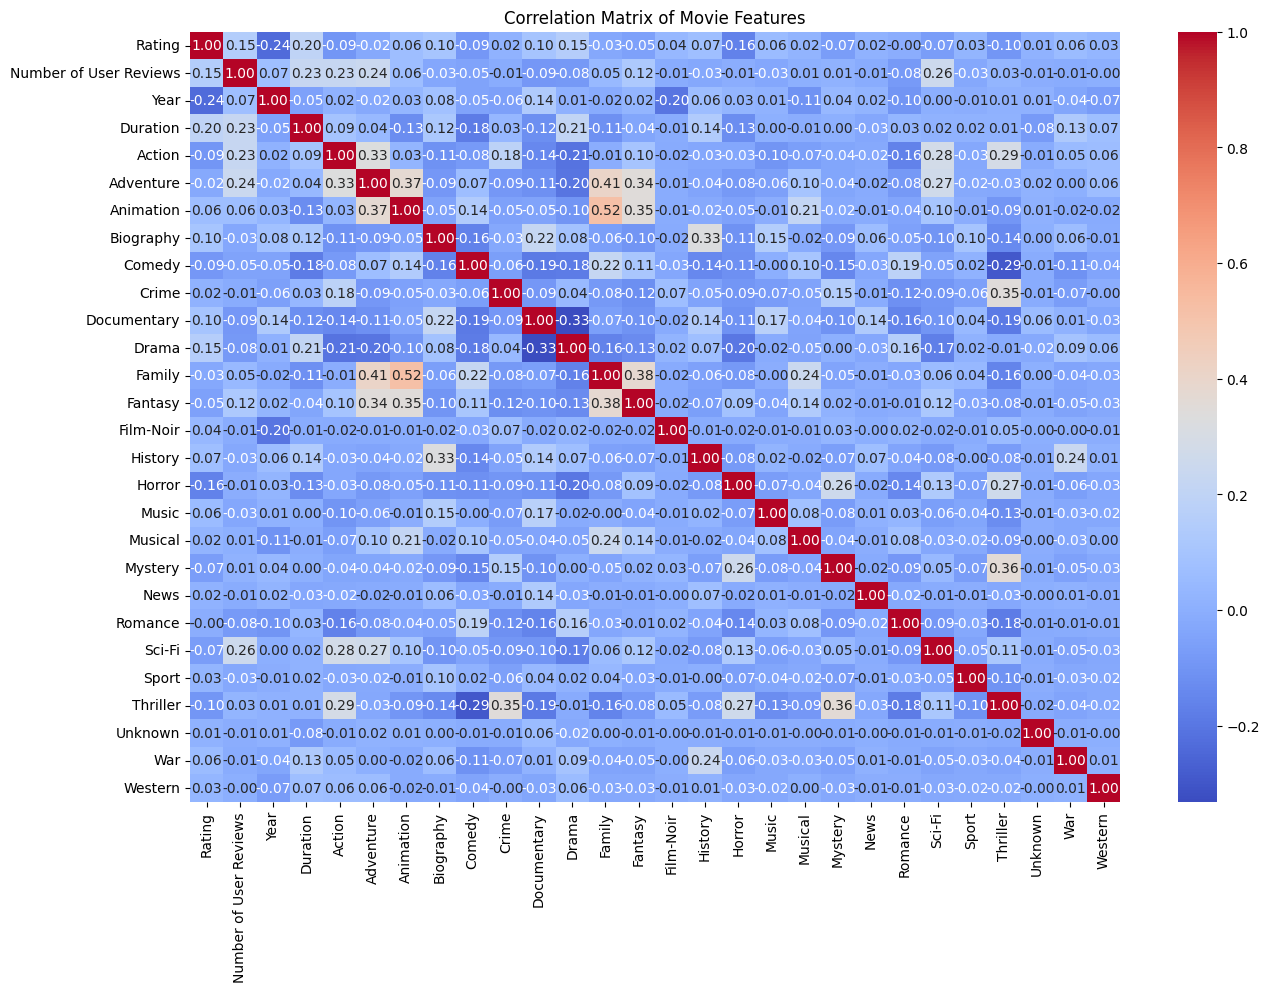

In [497]:
import seaborn as sns

df_clean = df.select_dtypes(include=[float, int, bool])

# Calculate the correlation matrix
correlation_matrix = df_clean.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Movie Features')
plt.show()

In [498]:
# Selecting relevant features for clustering
relevant_features = ['Rating', 'Number of User Reviews', 'Year', 'Duration'] + list(df_clean.columns[5:])

# Extracting the relevant subset of the data
clustering_data = df_clean[relevant_features]

# Checking for missing values or other inconsistencies
clustering_data_info = {
    "missing_values": clustering_data.isnull().sum(),
    "sample_data": clustering_data.head()
}

clustering_data_info


{'missing_values': Rating                    0
 Number of User Reviews    0
 Year                      0
 Duration                  0
 Adventure                 0
 Animation                 0
 Biography                 0
 Comedy                    0
 Crime                     0
 Documentary               0
 Drama                     0
 Family                    0
 Fantasy                   0
 Film-Noir                 0
 History                   0
 Horror                    0
 Music                     0
 Musical                   0
 Mystery                   0
 News                      0
 Romance                   0
 Sci-Fi                    0
 Sport                     0
 Thriller                  0
 Unknown                   0
 War                       0
 Western                   0
 dtype: int64,
 'sample_data':    Rating  Number of User Reviews  Year  Duration  Adventure  Animation  \
 0     7.6                   135.0  1996       572          0          0   
 1     8.7       

In [499]:
clustering_data.drop(['Number of User Reviews', 'Rating', 'Duration', 'Year'], axis=1, inplace=True)

In [500]:
clustering_data.columns

Index(['Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'Unknown', 'War', 'Western'],
      dtype='object')

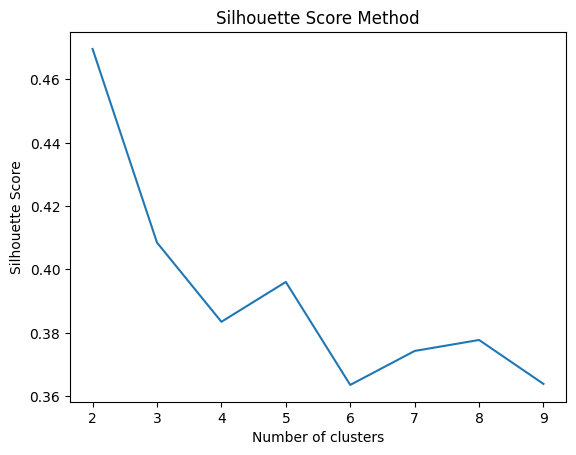

In [517]:
# assuming 'data' is our multidimensional data
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(clustering_data)
    score = silhouette_score(clustering_data, kmeans.labels_)
    scores.append(score)
 
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [518]:
# Apply K-Means with 9 clusters
kmeans_8 = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_8 = kmeans_8.fit_predict(clustering_data)

# Calculate the silhouette score
silhouette_score_8 = silhouette_score(clustering_data, clusters_8)
print(f"Silhouette Score for 8 clusters: {silhouette_score_8}")

Silhouette Score for 8 clusters: 0.37774870250358994


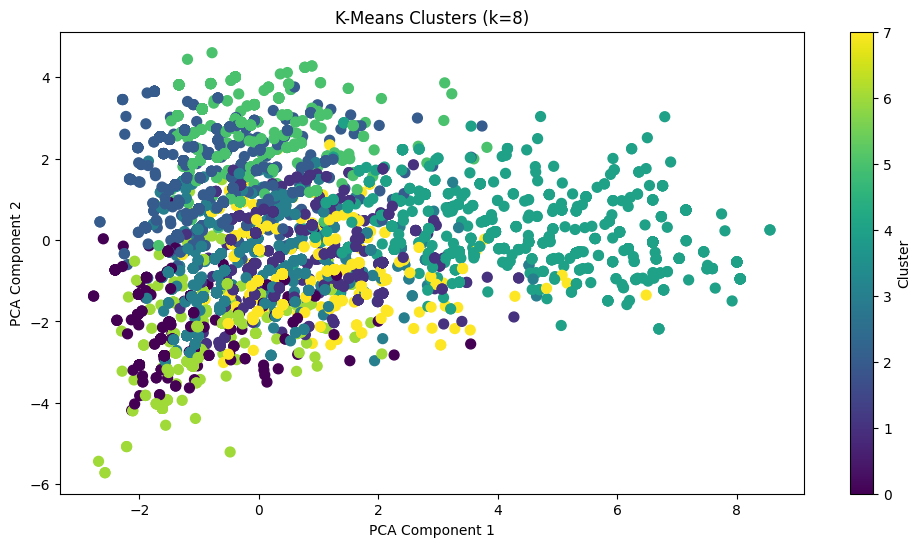

In [519]:
# Visualize the clusters using PCA to reduce to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(12, 6))

# Plot K-Means clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters_8, cmap='viridis', s=50)
plt.title('K-Means Clusters (k=8)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [520]:
# Add the cluster labels to the clustering_data dataframe
clustering_data['Cluster'] = clusters_8

# Display the updated dataframe to verify the changes
clustering_data.head()

,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,3
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [521]:
# Merge dfinit and clustering_data on the index
merged_df = pd.merge(dfinit, clustering_data, left_index=True, right_index=True)

# Display the merged dataframe to verify the changes
merged_df.head()

,Title,Genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
0,Dekalog (1988),['Drama'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
1,Casablanca,"['Drama', 'Romance', 'War']",0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,3
2,Rear Window,"['Mystery', 'Thriller']",0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2
3,Lawrence of Arabia (re-release),"['Adventure', 'Biography', 'Drama', 'War']",1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,The Conformist,['Drama'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3


In [522]:
merged_df.value_counts('Cluster')

Cluster
3    2831
2    2186
1    1813
7    1196
5    1055
6    1040
4    1001
0     475
Name: count, dtype: int64

In [549]:
merged_df[merged_df['Cluster'] == 0].iloc[:, 2:-1].sum().sort_values(ascending=False)

Drama          468
History        464
Biography      254
War            141
Romance         82
Thriller        67
Adventure       46
Crime           34
Comedy          23
Sport           14
Mystery         13
Western         13
Music           12
Animation       12
Musical          8
Documentary      8
Fantasy          7
Family           5
Horror           3
News             1
Film-Noir        0
Sci-Fi           0
Unknown          0
dtype: int64

In [523]:
merged_df[merged_df['Cluster'] == 0].sample(20)

,Title,Genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
6492,The Patriot,"['Action', 'Drama', 'History', 'War']",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12669,Sound of Freedom,"['Biography', 'Crime', 'Drama', 'History', 'Th...",0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8194,A Tale of Love and Darkness,"['Biography', 'Drama', 'History', 'Mystery', '...",0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
281,The Right Stuff,"['Adventure', 'Biography', 'Drama', 'History']",1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2206,The Promised Land,"['Action', 'Biography', 'Drama', 'History']",0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2812,Augustine,"['Biography', 'Drama', 'History']",0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
444,Capote,"['Biography', 'Crime', 'Drama', 'History']",0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
34,The Passion of Joan of Arc,"['Biography', 'Drama', 'History']",0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5839,Pawn Sacrifice,"['Biography', 'Drama', 'History', 'Sport', 'Th...",0,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2015,The Lost City of Z,"['Adventure', 'Biography', 'Drama', 'History']",1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [550]:
merged_df[merged_df['Cluster'] == 1].iloc[:, 2:-1].sum().sort_values(ascending=False)

Comedy         1813
Drama           925
Crime           275
Horror          123
Fantasy         120
Family          116
Music           101
Sport            90
Sci-Fi           82
Mystery          74
Biography        57
Adventure        51
Musical          44
Thriller         38
War              30
Western          16
Animation        14
History          12
Documentary       7
Unknown           1
News              0
Romance           0
Film-Noir         0
dtype: int64

In [524]:
merged_df[merged_df['Cluster'] == 1].sample(20)

,Title,Genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
11516,Unfrosted,"['Biography', 'Comedy', 'History']",0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12121,About My Father,['Comedy'],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12795,Flakes,['Comedy'],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2304,Career Girls,"['Comedy', 'Drama']",0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
684,Stranger Than Paradise,"['Comedy', 'Drama']",0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3970,Primary Colors,"['Comedy', 'Drama']",0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8864,ABCs of Death 2,"['Comedy', 'Horror']",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6136,Hot Shots! Part Deux,"['Action', 'Comedy']",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13586,Hick,"['Comedy', 'Drama']",0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
12253,Krystal,"['Comedy', 'Drama']",0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [548]:
clustering_data.columns

Index(['Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'Unknown', 'War', 'Western', 'Cluster'],
      dtype='object')

In [545]:
merged_df[merged_df['Cluster'] == 2].iloc[:, 2:-1].sum().sort_values(ascending=False)

Thriller       2171
Drama          1482
Crime          1167
Mystery         654
Adventure       284
Sci-Fi          266
Romance         199
Comedy          176
War              64
Fantasy          60
Biography        51
Horror           35
Western          35
Film-Noir        22
History          21
Animation        14
Music             9
Musical           6
Family            6
Sport             5
Documentary       4
News              0
Unknown           0
dtype: int64

### Teenagers Movies

In [525]:
merged_df[merged_df['Cluster'] == 2].sample(20)

,Title,Genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
9406,Safe House,"['Action', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
4027,On the Job,"['Action', 'Crime', 'Drama', 'Thriller']",0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,2
13656,Jiu Jitsu,"['Action', 'Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
231,Burning,"['Drama', 'Mystery', 'Thriller']",0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,2
8242,Strange But True,"['Drama', 'Mystery', 'Thriller']",0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,2
4899,Primer,"['Drama', 'Sci-Fi', 'Thriller']",0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,2
13917,Return to Sender,"['Drama', 'Thriller']",0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2
728,First Reformed,"['Drama', 'Mystery', 'Thriller']",0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,2
2524,A Hard Day,"['Action', 'Crime', 'Thriller']",0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,2
12558,Turner & Hooch,"['Comedy', 'Crime', 'Drama', 'Thriller']",0,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,2


### Love Movies

In [543]:
merged_df[merged_df['Cluster'] == 3].iloc[:, 2:-1].sum().sort_values(ascending=False)

Drama          2782
Romance         830
Biography       380
Crime           325
Music           198
War             180
Adventure       174
Sport           155
Fantasy         155
Mystery         143
Sci-Fi          117
Western         101
Family           78
Horror           72
Musical          59
Animation        32
Film-Noir         8
Documentary       7
Unknown           2
Thriller          1
History           0
News              0
Comedy            0
dtype: int64

In [526]:
merged_df[merged_df['Cluster'] == 3].sample(20)

,Title,Genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
6382,The Ballad of Lefty Brown,"['Action', 'Drama', 'Western']",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3
13993,God's Not Dead 2,['Drama'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
2656,"Nico, 1988","['Biography', 'Drama', 'Music']",0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
12692,A Promise,"['Drama', 'Romance']",0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,3
5199,Hipsters,"['Drama', 'Musical', 'Romance']",0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,3
1535,Bad Education,"['Crime', 'Drama']",0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3
5163,Rosewater,"['Biography', 'Drama']",0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
9877,My Name Is Khan,"['Adventure', 'Drama', 'Romance']",1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,3
13334,Fathers and Daughters,['Drama'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
1200,Ajami,"['Crime', 'Drama']",0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3


### Family Friendly Movies

In [542]:
merged_df[merged_df['Cluster'] == 4].iloc[:, 2:-1].sum().sort_values(ascending=False)

Adventure      928
Family         614
Comedy         604
Fantasy        600
Animation      398
Sci-Fi         341
Drama          158
Musical        117
Romance         87
Mystery         71
Thriller        59
Crime           47
Music           28
Horror          26
Sport           20
War             16
Western         13
History          6
Biography        2
News             0
Film-Noir        0
Documentary      0
Unknown          0
dtype: int64

In [527]:
merged_df[merged_df['Cluster'] == 4].sample(20)

,Title,Genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
2185,The Jungle Book,"['Animation', 'Action', 'Adventure', 'Drama', ...",1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,4
1888,Yellow Submarine,"['Animation', 'Adventure', 'Comedy', 'Fantasy'...",1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7495,Kingsman: The Secret Service,"['Action', 'Adventure', 'Comedy', 'Thriller']",1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
9638,Trolls World Tour,"['Animation', 'Adventure', 'Comedy', 'Family',...",1,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,4
5486,Stardust,"['Adventure', 'Family', 'Fantasy', 'Romance']",1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,4
5429,Tales of the Night,"['Animation', 'Family', 'Fantasy']",0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
13235,Troop Beverly Hills,"['Adventure', 'Comedy']",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
13743,Mac and Me,"['Adventure', 'Comedy', 'Family', 'Sci-Fi']",1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,4
12171,The Sword and the Sorcerer,"['Action', 'Adventure', 'Fantasy', 'Horror']",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9760,PAW Patrol: The Movie,"['Animation', 'Action', 'Adventure', 'Comedy',...",1,1,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,4


### Jump Scares Movies

In [540]:
merged_df[merged_df['Cluster'] == 5].iloc[:, 2:-1].sum().sort_values(ascending=False)

Horror         1036
Thriller        771
Mystery         463
Drama           270
Sci-Fi          250
Fantasy         140
Comedy           85
Crime            58
Adventure        55
Romance          33
Animation         8
Music             8
War               7
Musical           5
Family            3
Documentary       3
Western           3
Biography         2
History           1
Film-Noir         0
News              0
Sport             0
Unknown           0
dtype: int64

In [528]:
merged_df[merged_df['Cluster'] == 5].sample(20)

,Title,Genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
6823,Twins of Evil,['Horror'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
11679,High Tension,['Horror'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
14121,The Devil Inside,['Horror'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
13630,The Haunting of Molly Hartley,"['Drama', 'Horror', 'Thriller']",0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,5
8587,Zombie,['Horror'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
13399,Saw VI,"['Horror', 'Mystery', 'Thriller']",0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,5
3511,The Dark and the Wicked,['Horror'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
12177,The Wraith,"['Action', 'Horror', 'Romance', 'Sci-Fi', 'Thr...",0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,5
1171,The Exorcist,['Horror'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
12878,The Messengers,"['Drama', 'Horror', 'Mystery']",0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,5


### Mostly Docu-mental Movies

In [539]:
merged_df[merged_df['Cluster'] == 6].shape

(1040, 26)

In [538]:
merged_df[merged_df['Cluster'] == 6].iloc[:, 2:-1].sum().sort_values(ascending=False)

Documentary    1039
Biography       309
Music           186
History         160
Crime            64
Sport            60
Drama            57
War              54
Comedy           48
Family           22
News             21
Adventure        15
Mystery          13
Animation        13
Thriller          8
Romance           6
Unknown           6
Musical           5
Horror            3
Western           3
Sci-Fi            2
Fantasy           1
Film-Noir         0
dtype: int64

In [529]:
merged_df[merged_df['Cluster'] == 6].sample(20)

,Title,Genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
8729,Michael Moore in TrumpLand,"['Documentary', 'Comedy']",0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4949,Ghosts of the Abyss,"['Documentary', 'Family']",0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,6
3342,Shut Up and Play the Hits,"['Documentary', 'Music']",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
2574,The Most Dangerous Man in America: Daniel Ells...,['Documentary'],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
2875,The Bleeding Edge,['Documentary'],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
1434,Midnight Family,['Documentary'],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
903,American Movie,"['Documentary', 'Comedy']",0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
5116,The Green Prince,"['Documentary', 'Biography']",0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
692,Maidan,['Documentary'],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
1431,Three Identical Strangers,"['Documentary', 'Biography', 'Drama', 'Mystery']",0,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,6


### Love, Laughter, and Tears movies

In [537]:
merged_df[merged_df['Cluster'] == 7].iloc[:, 2:-1].sum().sort_values(ascending=False)

Romance        1196
Comedy         1179
Drama           693
Fantasy          93
Crime            75
Music            69
Musical          55
Adventure        54
Family           54
Thriller         38
Sport            34
Sci-Fi           33
Mystery          19
Horror           18
Biography        17
Western          12
Animation         8
War               7
History           5
Documentary       3
Film-Noir         2
News              0
Unknown           0
dtype: int64

In [530]:
merged_df[merged_df['Cluster'] == 7].sample(20)

,Title,Genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
12630,I'm Reed Fish,"['Comedy', 'Drama', 'Romance']",0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,7
11915,Darling Companion,"['Comedy', 'Drama', 'Romance']",0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,7
9682,At Midnight,"['Comedy', 'Romance']",0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
7387,Extract,"['Comedy', 'Crime', 'Romance']",0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,7
13146,High School High,"['Comedy', 'Crime', 'Romance']",0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,7
13028,Soul Man,"['Comedy', 'Romance']",0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
5146,Moscow on the Hudson,"['Comedy', 'Drama', 'Romance']",0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,7
9657,Just Wright,"['Comedy', 'Romance', 'Sport']",0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,7
2317,Tramps,"['Adventure', 'Romance']",1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
13007,Mr. Destiny,"['Comedy', 'Fantasy', 'Romance']",0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7


## Evaluation

In [531]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the clusters
silhouette_avg = silhouette_score(clustering_data, clusters_8)
print(f"Silhouette Score for 8 clusters: {silhouette_avg}")

Silhouette Score for 8 clusters: 0.4093507860559037


## Where the movie is!

In [533]:
merged_df[merged_df['Title'] == 'Bad Boys']

,Title,Genres,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
8939,Bad Boys,"['Crime', 'Drama', 'Thriller']",0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,2
11890,Bad Boys,"['Action', 'Comedy', 'Crime', 'Thriller']",0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,2
